<a href="https://colab.research.google.com/github/saikrishbalaji/Hurricane/blob/main/New_Hurricane_Formation_Prediction_with_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Run this to download data and prepare our environment! { display-mode: "form" }
!pip install scikeras > /dev/null
!pip install -q tfds-nightly tensorflow matplotlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape, Dense, Conv2D, GlobalAveragePooling2D
from scikeras.wrappers import KerasClassifier
import tensorflow.keras.optimizers as optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os

import numpy as np

from keras.src import backend
from keras.src.api_export import keras_export
from keras.src.datasets.cifar import load_batch
from keras.src.utils.file_utils import get_file

from PIL import Image
import gdown
from IPython import display
from google.colab import files
from google.colab import drive
import hashlib
import warnings

warnings.filterwarnings("ignore")

def load_image(image_path, img_size=(64, 64)):
    image = load_img(image_path, target_size=img_size)
    image = img_to_array(image)
    return image




drive.mount('/content/drive')

!wget -q --show-progress "/content/drive/MyDrive/Colab Notebooks/Inspirit AI/HURSAT_b1_v06_1990008N01172_KORYN_c20170721.tar.gz"
!wget -q --show-progress "/Users/devibala08/Downloads/mygeodata/1990008N01172.KORYN.1990.01.08.0000.37.GMS-4.013.hursat-b1.v06IRWIN.jpg"
#!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20%20Object%20Detection%20(Autonomous%20Vehicles)/sliding.gif.png"

'''files.upload()
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd
!kaggle datasets list
!pip install --upgrade --force-reinstall --no-deps kaggle
!kaggle datasets download --force -d saikrishbalaji/hurricane'''


data = "/content/drive/MyDrive/Colab Notebooks/Inspirit AI/hurricane"
images = []
labels = []

for label_dir in os.listdir(data):
    if os.path.isdir(os.path.join(data, label_dir)):
        for fle in os.listdir(os.path.join(data, label_dir)):
            image_path = os.path.join(data, label_dir, fle)
            images.append(load_image(image_path))
            labels.append(label_dir)


images = np.array(images)
labels = np.array(labels)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)
labels_categorical = to_categorical(encoded_label, num_classes)


# neural net parameters
image_shape          = (64, 64, 3)

nn_params = {}
nn_params['input_shape']       = image_shape
nn_params['output_neurons']    = 3
nn_params['loss']              = 'categorical_crossentropy'
nn_params['output_activation'] = 'softmax'
nn_params['learning_rate'] = 1e-3
nn_params['momentum'] = 0.9




Mounted at /content/drive


In [ ]:
# Load data
images/=255
X_train, X_test, y_train, y_test = train_test_split(images,labels_categorical,test_size=0.2,random_state=42, shuffle=True)

In [ ]:
### YOUR CODE HERE

# specify the network
cnn = Sequential()
cnn.add(Conv2D(128, (3, 3), input_shape=(64, 64, 3)))
cnn.add(Dropout(0.2))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))


cnn.add(Conv2D(64, (3, 3), padding = 'same'))
cnn.add(Dropout(0.2))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))


cnn.add(Conv2D(64, (3, 3), padding = 'same'))
cnn.add(Dropout(0.2))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, (3, 3), padding = 'same'))
cnn.add(Dropout(0.2))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, (3, 3), padding = 'same'))
cnn.add(Dropout(0.2))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))


cnn.add(Flatten())
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = 3, activation = 'sigmoid'))
# compile the network

# initiate RMSprop optimizer

cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(cnn.summary())

### END CODE

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 31, 31, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 196,867 (769.01 KB)

 Trainable params: 196,867 (769.01 KB)

 Non-trainable params: 0 (0.00 B)

None


Once we've compiled the network, train it for 20 epochs.



Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 828ms/step - accuracy: 0.8910 - loss: 0.3234 - val_accuracy: 0.8000 - val_loss: 0.5129
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 764ms/step - accuracy: 0.8910 - loss: 0.3235 - val_accuracy: 0.6667 - val_loss: 0.5697
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 801ms/step - accuracy: 0.8792 - loss: 0.2694 - val_accuracy: 0.8000 - val_loss: 0.5284
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 736ms/step - accuracy: 0.8361 - loss: 0.3130 - val_accuracy: 0.8667 - val_loss: 0.4635
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9139 - loss: 0.2783 - val_accuracy: 0.6000 - val_loss: 0.6318
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 754ms/step - accuracy: 0.8153 - loss: 0.3847 - val_accuracy: 0.8000 - val_loss: 0.4612
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step - accuracy: 0.8806 - loss: 0.2199 - val_accuracy: 0.7333 - val_loss: 0.5031
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 759ms/step - accuracy: 0.8812 - loss: 0.2447 - val_accuracy: 0.7333 - val_loss: 0.

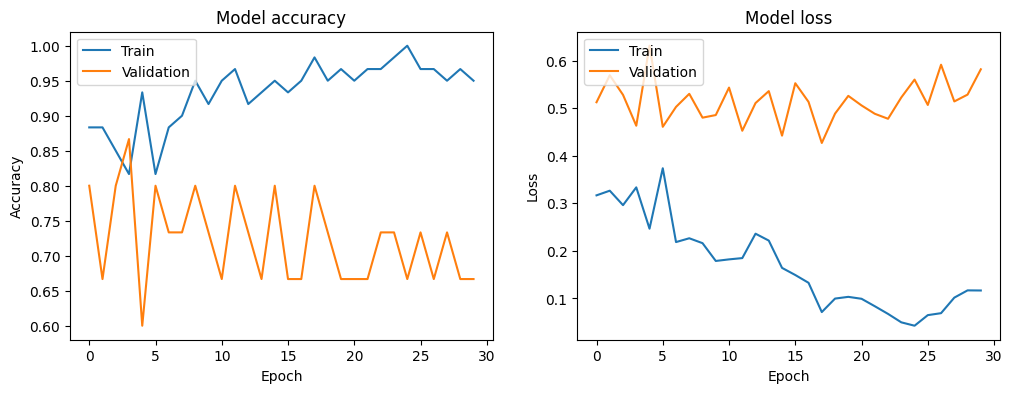

ValueError: Unrecognized data type: x=/Users/devibala08/Desktop/HURSAT_b1_v06_1990008N01172_KORYN_c20170721/data_batch_1/Thunderstorm1.png (of type <class 'str'>)

In [ ]:
### YOUR CODE HERE
history = cnn.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), shuffle=True)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
### END CODE